### homework7:使用DPCM编码，对随机一张灰度图进行编码和解码，比较不同量化器（1bit,2bit,4bit,8bit)的重建图像的区别，并计算重建图像的PSNR和SSIM值

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
from skimage.metrics import structural_similarity
from skimage.metrics import peak_signal_noise_ratio

In [3]:
def quantize_error(error, levels): #量化器
    max=255;
    min=-255;

    q = (max-min)/levels
    i = 1
    while error > min+q*i:
        i=i+1
    
    quantized_error = min+q*i
    return quantized_error


In [4]:
def DPCM(img, levels):#边编码边解码
    n,m=img.shape
    N=n*m
    im=img.reshape(N)
    quantized_error=np.zeros(im.shape)
    predictor=np.zeros(im.shape)

    for i in range(N):
        #Xi''
        if i==0:
            predicted = 0
        else:
            predicted = predictor[i-1]            
        error = im[i] - predicted  #ei
        quantized_error[i] = quantize_error(error,levels)  #ei'
        predictor[i] = predicted + quantized_error[i]  #Xi'
        
    quantized_error=quantized_error.reshape((n,m))
    predictor=predictor.reshape((n,m))
    return quantized_error,predictor



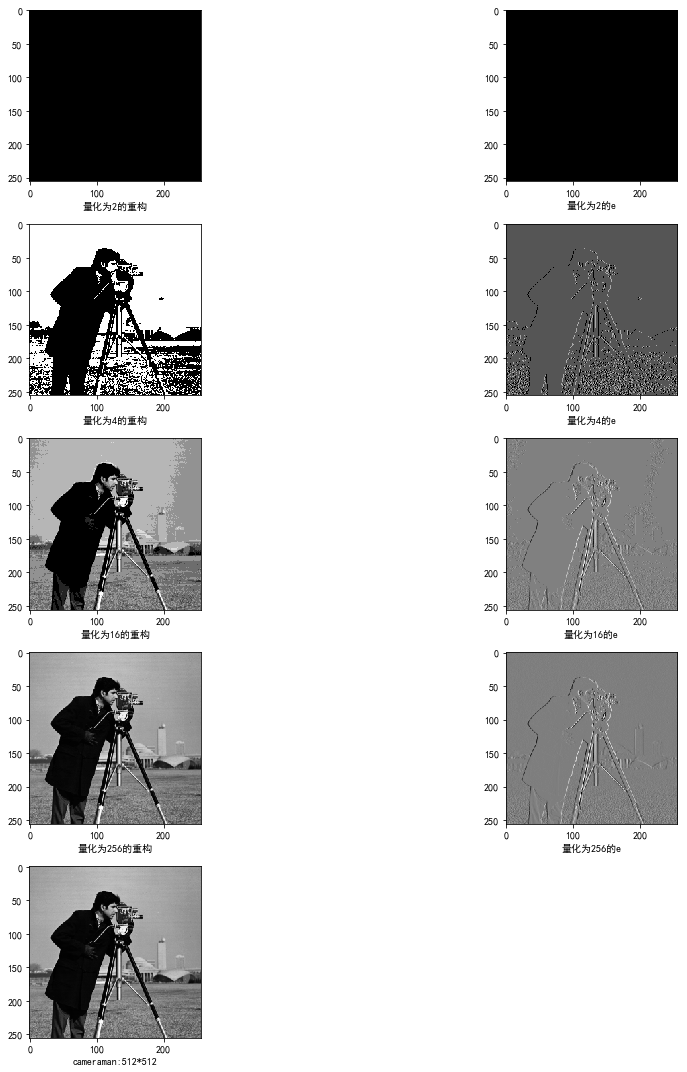

In [5]:
cameraman=cv2.imread('./cameraman.tif',0)

#量化QP为2
QP=[2,4,16,256]
#量化QP为2
error1,reconstructed1 = DPCM(cameraman, QP[0])
#量化QP为4
error2,reconstructed2 = DPCM(cameraman, QP[1]);
#量化QP为16
error3,reconstructed3 = DPCM(cameraman, QP[2]);
#量化QP为256
error4,reconstructed4 = DPCM(cameraman, QP[3]);

plt.figure(figsize=(15, 15))
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.subplot(521), plt.imshow(reconstructed1, 'gray'),plt.xlabel('量化为2的重构')
plt.subplot(522), plt.imshow(error1, 'gray'),plt.xlabel('量化为2的e')
plt.subplot(523), plt.imshow(reconstructed2, 'gray'),plt.xlabel('量化为4的重构')
plt.subplot(524), plt.imshow(error2, 'gray'),plt.xlabel('量化为4的e')
plt.subplot(525), plt.imshow(reconstructed3, 'gray'),plt.xlabel('量化为16的重构')
plt.subplot(526), plt.imshow(error3, 'gray'),plt.xlabel('量化为16的e')
plt.subplot(527), plt.imshow(reconstructed4, 'gray'),plt.xlabel('量化为256的重构')
plt.subplot(528), plt.imshow(error4, 'gray'),plt.xlabel('量化为256的e')
plt.subplot(529), plt.imshow(cameraman, 'gray'),plt.xlabel('cameraman:512*512')
plt.tight_layout()
plt.show()

In [13]:
#PSNR，SSIM
img=[reconstructed1,reconstructed2,reconstructed3,reconstructed4]
img1=cameraman
for i in range(4):
    img2=img[i]
    psnr = peak_signal_noise_ratio(img1, img2)
    ssim = structural_similarity(img1, img2, multichannel=False) 
    print('量化为',str(QP[i]),'的PSNR：',psnr)
    print('量化为',str(QP[i]),'的SSIM：',ssim)
    
'''
量化e的灰度级约大，恢复的越好。
'''

量化为 2 的PSNR： 4.617200059594713
量化为 2 的SSIM： 0.3898609301909038
量化为 4 的PSNR： 8.937786224176254
量化为 4 的SSIM： 0.5628854430911621
量化为 16 的PSNR： 22.604697787213194
量化为 16 的SSIM： 0.8222746187682519
量化为 256 的PSNR： 46.753762800887905
量化为 256 的SSIM： 0.9970339438527086


D:\soft\study\anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  
D:\soft\study\anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  import sys
C:\Users\肖灵芝\AppData\Roaming\Python\Python37\site-packages\skimage\_shared\utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)
